# Magnitude Demonstration

This notebook demonstrates the use of the `eigenpairflow` library to track eigenpairs and compute the magnitude of a one-parameter family of symmetric matrices $A(t)$.

## Mathematical Background

Given a one-parameter family of symmetric matrices $A(t)$, we consider its eigenvalue decomposition:
$$ A(t) = Q(t) \Lambda(t) Q(t)^T $$
where $Q(t)$ is an orthogonal matrix of eigenvectors and $\Lambda(t)$ is a diagonal matrix of eigenvalues.

By differentiating the equation $A(t)Q(t) = Q(t)\Lambda(t)$, we can derive a system of ordinary differential equations (ODEs) for $Q(t)$ and $\Lambda(t)$. The core equation for the derivatives is:
$$ F(t) = \frac{d\Lambda}{dt} + [H(t), \Lambda(t)] $$
where $F(t) = Q(t)^T \frac{dA}{dt} Q(t)$ and $H(t) = Q(t)^T \frac{dQ}{dt}$ is a skew-symmetric matrix.

The `eigenpairflow` library solves this system of ODEs to track the continuous evolution of eigenvalues and eigenvectors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import the main tracking function and result type
from eigenpairflow import eigenpairtrack, EigenTrackingResults

# Import application-specific helpers for magnitude analysis
from eigenpairflow.magnitude import (
    calculate_magnitudes,
    calculate_pseudo_magnitudes,
    get_zero_indices,
    plot_magnitudes,
)
from eigenpairflow.visualization import plot_tracking_results

In [2]:
# --- 1. Define the Problem: A Simple Matrix Function ---

# As a simple example, we use a predefined distance matrix D.
D = np.array([[0.0, 1.0, 2.0], [1.0, 0.0, 1.5], [2.0, 1.5, 0.0]])

def A_func(t):
    return np.exp(-t * D)

def dA_func(t):
    return -D * np.exp(-t * D)

In [3]:
# --- 2. Run the Eigenpair Tracking ---

t_start, t_end = 4.0, 1.0e-2
t_eval = np.geomspace(t_start, t_end, 10000)

print("--- Starting tracking and analysis (with correction) ---")
results = eigenpairtrack(
    A_func, dA_func, (t_start, t_end), t_eval, correction_method='ogita_aishima'
)

if not results.success:
    print(f"Tracking failed: {results.message}")
else:
    print("Tracking completed successfully.")

--- Starting tracking and analysis (with correction) ---
Tracking completed successfully.


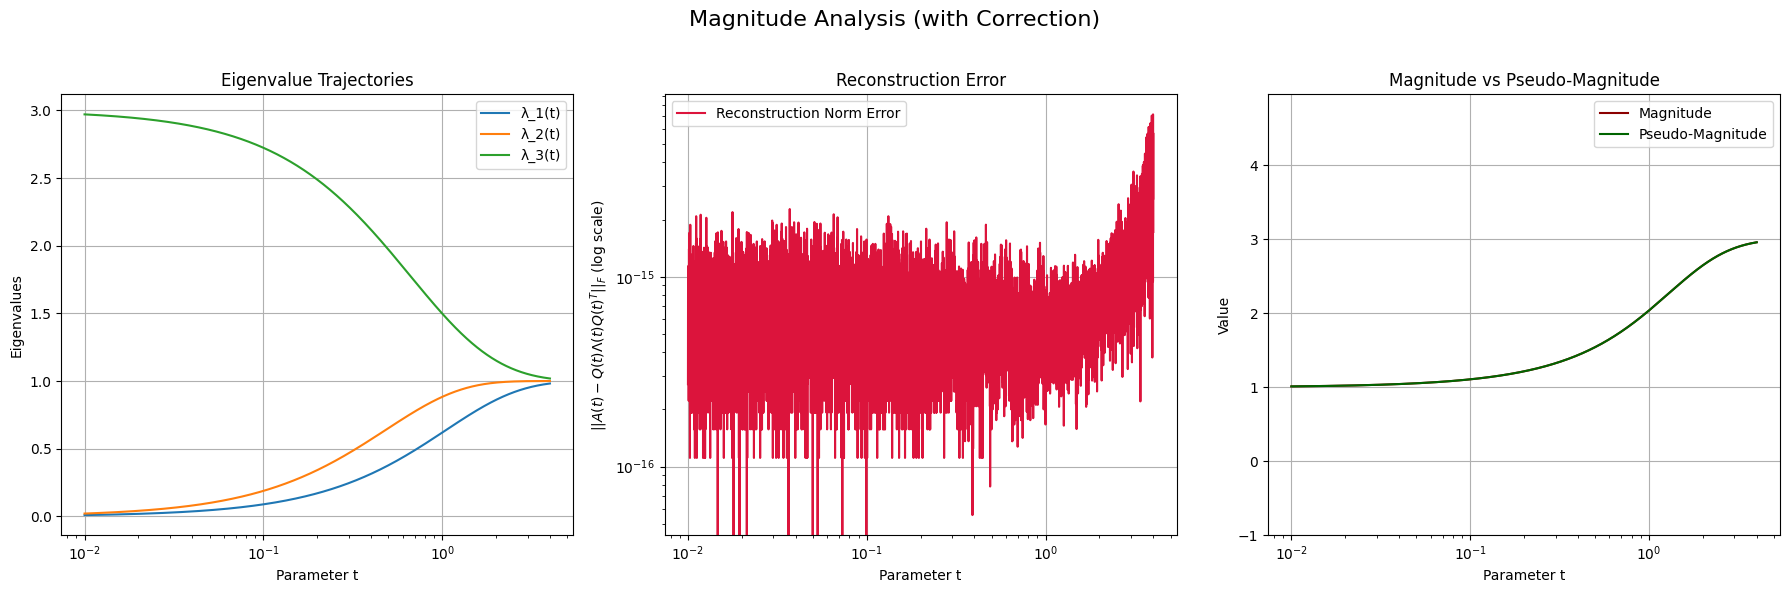

In [4]:
# --- 3. Post-processing and Visualization ---
if results.success:
    # Perform application-specific analysis (magnitude calculation)
    zero_indices = get_zero_indices(results.Lambdas)
    magnitudes = calculate_magnitudes(results.Qs, results.Lambdas, D)
    pseudo_magnitudes = calculate_pseudo_magnitudes(
        results.Qs, results.Lambdas, D, zero_indices
    )

    # Create a combined plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot the generic tracking results (eigenvalue trajectories and error)
    plot_tracking_results(results, axes=axes[0:2])
    
    # Plot the application-specific magnitude results
    plot_magnitudes(results.t_eval, magnitudes, pseudo_magnitudes, ax=axes[2])
    
    fig.suptitle("Magnitude Analysis (with Correction)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()